# Applying Masks & Filters

## NDWI Calculation

In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
image_file = "FILEPATH_HERE"
satdat = rasterio.open(image_file)

In [6]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [7]:
blue, green, red, nir = satdat.read()

In [8]:
# Calculate NDWI
ndwi = (green.astype(float) - nir.astype(float)) / (green + nir)

In [20]:
water_mask = np.full(ndwi.shape, np.nan)
land_mask = np.full(ndwi.shape, np.nan)

water_mask[ndwi >= 0] = 1
land_mask[ndwi < 0] = 1

## Visualizing Masks

Let's take a look at our water and land masks:

Text(0.5, 1.0, 'Houston water mask')

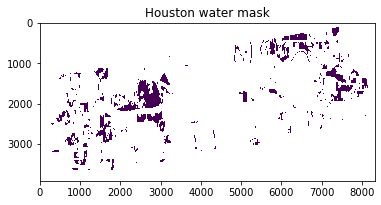

In [22]:
# In the below image, purple areas are those identified as water

plt.figure(1)
plt.imshow(water_mask)
plt.title("Houston water mask")

Text(0.5, 1.0, 'Houston land mask')

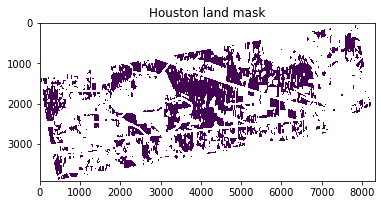

In [23]:
# In the below image, purple areas are those identified as land

plt.figure(2)
plt.imshow(land_mask)
plt.title("Houston land mask")

You might notice that in both images, there are still small portions of water within the land areas, and vice versa. What if we wanted to clean up this mask to get a more general area of where land and water areas are? We can do this by applying morphological filters to our masks.

## Apply Filters

In [50]:
closing_kernel_size = 35 #empty pixels within the mask
opening_kernel_size = 15 # filled pixels outside of mask

In [51]:
# Apply closing filter (remove empty pixels within mask)
closing_kernel_element = (closing_kernel_size, closing_kernel_size)
closing_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,closing_kernel_element)
mask_closed = cv2.morphologyEx(np.nan_to_num(water_mask), cv2.MORPH_CLOSE, closing_kernel)

# Apply opening filter (removing filled pixels outside of mask)
opening_kernel_element = (opening_kernel_size, opening_kernel_size)
opening_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, opening_kernel_element)
mask_closed_opened = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, opening_kernel)

# Ensure the clipped areas remain clipped
mask_closed_opened[mask_closed_opened == 0] = np.nan

water_mask_filtered = mask_closed_opened

Text(0.5, 1.0, 'Houston filtered water mask')

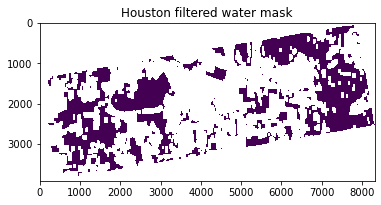

In [53]:
plt.figure(3)
plt.imshow(water_mask_filtered)
plt.title("Houston filtered water mask")

Now we have a much better idea of the large areas affected by floods!